## 6.1 Logistic Regression
- 1) Sigmoid Function
- 2) Logistic Function
- 3) Decision Function
- 4) Parameter Estimation of the Logistic Regression Model
- 5) Numerical Optimization
- 6) Normalization
- 7) StatsModel's Logistic Regression
    - Performance 
- 8) Scikit-Learn's Logistic Regression
    - example
- 9) Regression Analysis with Logistic Regression
    - example

### - Basic Concept of Logistic Regression
- Logistic Regression can be used for **1) Regression Analysis Problem**, **2) Classification Problem**
- Logitic Regression Model assumes that the target value's distribution is a binomial distribution, and the parameter ($\mu$) is dependent to variable $x$.
$$ p(y \mid x) = \text{Bin} (y; \mu(x), N) $$
- If N=1(only 1 trial) case, y's disribution could be a Bernoulli Distribution.
$$ p(y \mid x) = \text{Bern} (y; \mu(x) )$$
- If we solve a classification problem that has a target value(y) is 0 or 1, we predict $\mu(x)$ at first based on the $x$, and predict a tartget value(y).
- Therefore, it will be like as below,
$$ \hat{y} = \begin{cases} 1 & \text{ if } \mu(x) \geq 0.5 \\ 0 & \text{ if } \mu(x) < 0.5 \end{cases} $$

### 1) Sigmoid Function

- In a logistic regression model, it assumes that the Bern's parameter ($\mu$) is a function of x.
- $\mu(x)$ is a "sigmoid function", and it is a linear function that converts x values to the 0 to 1 values.
$$
\mu = f(w^Tx)
$$
- Parameter $\mu$ could have values between 0 to 1, the sigmoid function is needed.
- Below functions could be used for the sigmoid function
    - (1) Logistic Function
$$ \text{logitstic}(z) = \sigma(z) = \dfrac{1}{1+\exp{(-z)}} $$
    - (2) Hyperbolic Tangent Function
$$ \tanh(z) = \frac{\sinh z}{\cosh z} = \frac{(e^z - e^{-z})/2}{(e^z + e^{-z})/2} = 2 \sigma(2z) - 1$$
    - (3) Error Function
$$ \text{erf}(z) = \frac{2}{\sqrt\pi}\int_0^z e^{-t^2}\,dt $$

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1320: UserWarning: findfont: Font family ['nanumgothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


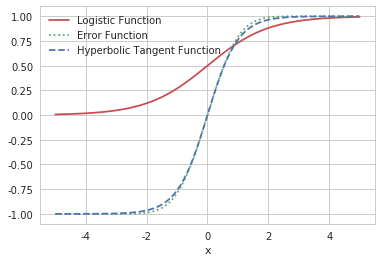

In [3]:
import matplotlib.pyplot as plt 
%matplotlib inline 

xx = np.linspace(-5, 5, 1000)
plt.plot(xx, 1/(1+np.exp(-xx)), 'r-', label="Logistic Function")
plt.plot(xx, sp.special.erf(0.5*np.sqrt(np.pi)*xx), 'g:', label="Error Function")
plt.plot(xx, np.tanh(xx), 'b--', label="Hyperbolic Tangent Function")
plt.ylim([-1.1, 1.1])
plt.legend(loc=2)
plt.xlabel("x")
plt.show()

### 2) Logistic Function
- convert values 0 to 1.
$$ \text{odds ratio} = \dfrac{\mu}{1-\mu} $$
$$ Logit Function = z = \text{logit}(\text{odds ratio}) = \log \left(\dfrac{\mu}{1-\mu}\right) $$ 
$$ \text{logitstic}(z) = \mu(z) = \dfrac{1}{1+\exp{(-z)}} $$

* if $z = 0$, $\mu = 0.5$
* if $z > 0$, $\mu > 0.5 \; \rightarrow \hat{y} = 1$
* if $z < 0$, $\mu < 0.5 \; \rightarrow \hat{y} = 0$
- decision function 
$$ z = w^Tx  $$

### 7) Logistic Regression (StatsModel)

In [5]:
from sklearn.datasets import make_classification

X0, y = make_classification(n_features = 1, 
                            n_redundant = 0,
                            n_informative=1, 
                            n_clusters_per_class=1,
                            random_state=4)

X = sm.add_constant(X0)

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1320: UserWarning: findfont: Font family ['nanumgothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


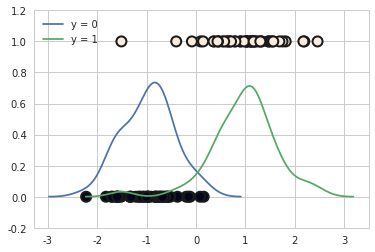

In [10]:
plt.scatter(X0, y, c=y, s=100, edgecolor='k', linewidth=2)
sns.distplot(X0[y == 0, :], label='y = 0', hist=False)
sns.distplot(X0[y == 1, :], label='y = 1', hist=False)
plt.ylim(-0.2, 1.2)
plt.show()

In [20]:
logit_mod = sm.Logit(y, X)
logit_res = logit_mod.fit(disp=0)
logit_res.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                        Results: Logit
==============================================================
Model:              Logit            No. Iterations:   8.0000 
Dependent Variable: y                Pseudo R-squared: 0.768  
Date:               2019-10-13 11:48 AIC:              36.1687
No. Observations:   100              BIC:              41.3791
Df Model:           1                Log-Likelihood:   -16.084
Df Residuals:       98               LL-Null:          -69.295
Converged:          1.0000           Scale:            1.0000 
----------------------------------------------------------------
          Coef.    Std.Err.     z      P>|z|     [0.025   0.975]
----------------------------------------------------------------
const     0.2515     0.4770   0.5272   0.5981   -0.6835   1.1864
x1        4.2382     0.9020   4.6986   0.0000    2.4703   6.0062
==============================================================

"""

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1320: UserWarning: findfont: Font family ['nanumgothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


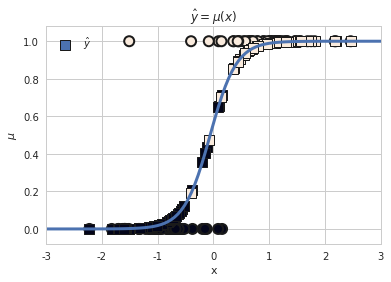

In [21]:
xx = np.linspace(-3, 3, 100)
mu = logit_res.predict(sm.add_constant(xx))
plt.plot(xx, mu, lw=3)
plt.scatter(X0, y, c=y, s= 100, edgecolor='k', lw=2)
plt.scatter(X0, logit_res.predict(X), label=r"$\hat{y}$", marker='s', c=y,
            s=100, edgecolor="k", lw=1)
plt.xlim(-3, 3)
plt.xlabel('x')
plt.ylabel(r"$\mu$")
plt.title(r"$\hat{y} = \mu(x)$")
plt.legend()
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1320: UserWarning: findfont: Font family ['nanumgothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


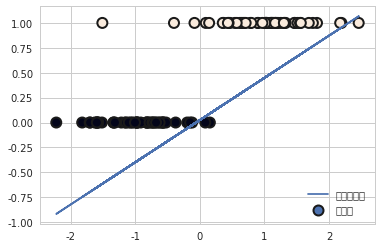

In [22]:
plt.scatter(X0, y, c=y, s=100, edgecolor="k", lw=2, label="데이터")
plt.plot(X0, logit_res.fittedvalues * 0.1, label="판별함수값")
plt.legend()
plt.show()

In [23]:
from sklearn.metrics import log_loss

y_hat = logit_res.predict(X)
log_loss(y, y_hat, normalize=False)

16.084355200413036

In [24]:
mu_null = np.sum(y) / len(y)
mu_null

0.51

In [25]:
y_null = np.ones_like(y) * mu_null
log_loss(y, y_null, normalize=False)

69.29471672244784

In [26]:
1 - (log_loss(y, y_hat) / log_loss(y, y_null))


0.7678848264170398

### 8) Logistic Regression (Scikit-Learn)

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1320: UserWarning: findfont: Font family ['nanumgothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


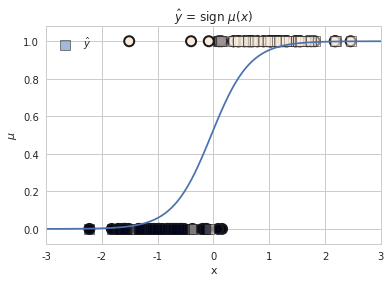

In [27]:
from sklearn.linear_model import LogisticRegression

model_sk = LogisticRegression().fit(X0, y)

xx = np.linspace(-3, 3, 100)
mu = 1.0/(1 + np.exp(-model_sk.coef_[0][0]*xx - model_sk.intercept_[0]))
plt.plot(xx, mu)
plt.scatter(X0, y, c=y, s=100, edgecolor="k", lw=2)
plt.scatter(X0, model_sk.predict(X0), label=r"$\hat{y}$", marker='s', c=y,
            s=100, edgecolor="k", lw=1, alpha=0.5)
plt.xlim(-3, 3)
plt.xlabel("x")
plt.ylabel(r"$\mu$")
plt.title(r"$\hat{y}$ = sign $\mu(x)$")
plt.legend()
plt.show()

### Example)

In [29]:
data_med = sm.datasets.get_rdataset("MedGPA", package="Stat2Data")
df_med = data_med.data

In [30]:
df_med.tail()

,Accept,Acceptance,Sex,BCPM,GPA,VR,PS,WS,BS,MCAT,Apps
50,D,0,M,2.41,2.72,8,8,8.0,8,32,7
51,D,0,M,3.51,3.56,11,8,6.0,9,34,6
52,A,1,F,3.43,3.48,7,10,7.0,10,34,14
53,D,0,M,2.61,2.80,7,5,NaN,6,18,6
54,D,0,M,3.36,3.44,11,11,8.0,9,39,1


In [32]:
df_med.shape

(55, 11)

In [33]:
# Binary Classification
df_med['Accept'].unique()

array(['D', 'A'], dtype=object)

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1320: UserWarning: findfont: Font family ['nanumgothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


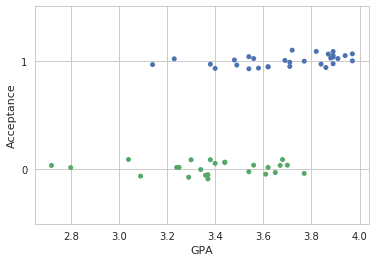

In [36]:
sns.stripplot(x='GPA', y='Acceptance', data=df_med,
             jitter=True, orient='h', order=[1,0])
plt.grid(True)
plt.show()

In [38]:
# Logistic Regression Analysis
# MCAT = VR + PS + WS + BS

model_med = sm.Logit.from_formula("Acceptance ~ Sex + BCPM + GPA + VR + PS + WS + BS + Apps", df_med)
result_med = model_med.fit()
print(result_med.summary2())

Optimization terminated successfully.
         Current function value: 0.280736
         Iterations 9
                        Results: Logit
Model:              Logit            No. Iterations:   9.0000 
Dependent Variable: Acceptance       Pseudo R-squared: 0.591  
Date:               2019-10-13 12:00 AIC:              48.3194
No. Observations:   54               BIC:              66.2203
Df Model:           8                Log-Likelihood:   -15.160
Df Residuals:       45               LL-Null:          -37.096
Converged:          1.0000           Scale:            1.0000 
--------------------------------------------------------------
             Coef.   Std.Err.    z    P>|z|   [0.025   0.975] 
--------------------------------------------------------------
Intercept   -46.6414  15.5997 -2.9899 0.0028 -77.2162 -16.0666
Sex[T.M]     -2.2835   1.4295 -1.5975 0.1102  -5.0852   0.5182
BCPM         -6.1633   6.9630 -0.8852 0.3761 -19.8106   7.4839
GPA          12.3973   8.6107  1.4397 0.

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1320: UserWarning: findfont: Font family ['nanumgothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


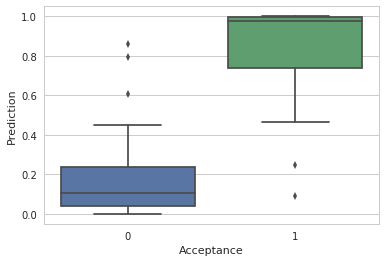

In [39]:
df_med['Prediction'] = result_med.predict(df_med)
sns.boxplot(x='Acceptance', y='Prediction', data=df_med)
plt.show()

## Practice
- In a Iris data, only use the versicolor and virginica data.
- Try to predict with Logistic Regression model, and print the summary.
- Use all random variables.
- From this report, try to find the decision function that classify between Setosa and versicolor.
- From the above result, print confusion matrix and classification_report.
- Draw a ROC Curve and FInd AUC. Do not Use the Scikit-learn's Logistic Regression. Use the StatsModel's Logistic Regression.

In [42]:
from sklearn.datasets import load_iris
iris = load_iris()

In [45]:
iris.data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [46]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [49]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [50]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [67]:
df = pd.DataFrame(iris.data, columns=iris.feature_names)
sy = pd.Series(iris.target, dtype='category')
df['target']= sy
df = df[(df['target'] == 0) | (df['target'] == 1)].reset_index(drop=True)
df = df[['sepal length (cm)', 'target']]

In [68]:
X = sm.add_constant(df['sepal length (cm)'])
y = df['target']

In [82]:
logistic_model = sm.Logit(y, X)
logit_res = logistic_model.fit(disp=0)
print(logit_res.summary2())

                           Results: Logit
Model:                Logit              No. Iterations:     8.0000 
Dependent Variable:   target             Pseudo R-squared:   0.537  
Date:                 2019-10-13 12:20   AIC:                68.2113
No. Observations:     100                BIC:                73.4216
Df Model:             1                  Log-Likelihood:     -32.106
Df Residuals:         98                 LL-Null:            -69.315
Converged:            1.0000             Scale:              1.0000 
--------------------------------------------------------------------
                   Coef.   Std.Err.    z    P>|z|   [0.025   0.975] 
--------------------------------------------------------------------
const             -27.8315   5.4336 -5.1221 0.0000 -38.4811 -17.1818
sepal length (cm)   5.1403   1.0066  5.1068 0.0000   3.1675   7.1132



C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1320: UserWarning: findfont: Font family ['nanumgothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


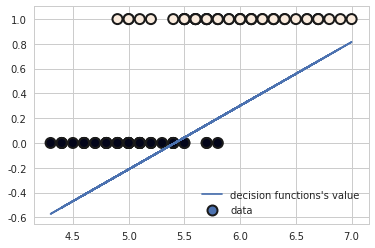

In [83]:
plt.scatter(df['sepal length (cm)'], y, c=y, s=100, edgecolor="k", lw=2, label="data")
plt.plot(df['sepal length (cm)'], logit_res.fittedvalues * 0.1, label="decision functions's value")
plt.legend()
plt.show()

In [84]:
df['Prediction'] = logit_res.predict(X)

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1320: UserWarning: findfont: Font family ['nanumgothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


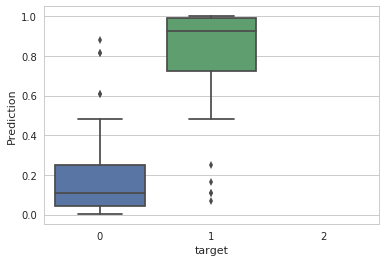

In [92]:
sns.boxplot(x='target', y='Prediction', data=df)
plt.show()

In [109]:
ls = [] 
for i in df['Prediction']:
    if i > 0.5:
        ls.append(1)
    elif i < 0.5:
        ls.append(0)
    else:
        print('check')

In [110]:
df['Prediction_category'] = ls

In [111]:
df['Prediction_category'] = df['Prediction_category'].astype('category')

In [114]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

print(confusion_matrix(df['target'], df['Prediction_category']))
print(classification_report(df['target'], df['Prediction_category']))

[[45  5]
 [ 6 44]]
             precision    recall  f1-score   support

          0       0.88      0.90      0.89        50
          1       0.90      0.88      0.89        50

avg / total       0.89      0.89      0.89       100



In [119]:
recall = 45 / (45 + 5)
fallout = 6 / (6 + 44)

print('recall = ', recall)
print('fall out = ', fallout)

recall =  0.9
fall out =  0.12


In [116]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(df['target'], df['Prediction'])
fpr, tpr, thresholds

(array([0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.02,
        0.06, 0.06, 0.1 , 0.2 , 0.22, 0.28, 0.44, 0.6 , 0.68, 0.78, 0.82,
        0.9 , 0.92, 0.98, 1.  ]),
 array([0.02, 0.06, 0.12, 0.16, 0.18, 0.22, 0.28, 0.32, 0.48, 0.52, 0.58,
        0.68, 0.78, 0.88, 0.9 , 0.9 , 0.92, 0.94, 0.98, 1.  , 1.  , 1.  ,
        1.  , 1.  , 1.  , 1.  ]),
 array([0.99971161, 0.99919417, 0.99865337, 0.99775044, 0.99624436,
        0.9937363 , 0.98957085, 0.9826836 , 0.95304918, 0.92389836,
        0.87894726, 0.81282396, 0.72200549, 0.60835381, 0.48159935,
        0.35716977, 0.24942093, 0.16579367, 0.1062368 , 0.06637193,
        0.04078357, 0.02479825, 0.01498061, 0.00901385, 0.00541059,
        0.00324301]))

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1320: UserWarning: findfont: Font family ['nanumgothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


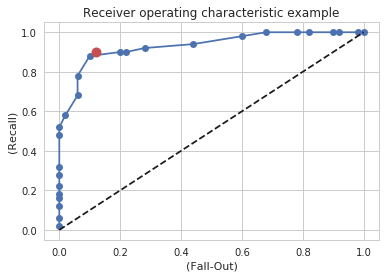

In [120]:
plt.plot(fpr, tpr, 'o-', label="Logistic Regression")
plt.plot([0, 1], [0, 1], 'k--', label="random guess")
plt.plot([fallout], [recall], 'ro', ms=10)
plt.xlabel('(Fall-Out)')
plt.ylabel('(Recall)')
plt.title('Receiver operating characteristic example')
plt.show()

In [123]:
from sklearn.metrics import auc
auc(fpr, tpr)

0.9325999999999999